# Example Code for Lecture 15

The following notebook contains examples of python code for anomaly detection.

# Graphical Approach

In [1]:
import pandas as pd

data = pd.read_csv('patients.csv',header='infer')
data.head()

,Gender,Height,Weight
0,Female,4.8,99.2
1,Female,5.1,109.5
2,Female,5.3,118.7
3,Male,5.4,136.4
4,Male,5.4,162.8


In [2]:
print('Number of rows =', data.shape[0])

Number of rows = 15


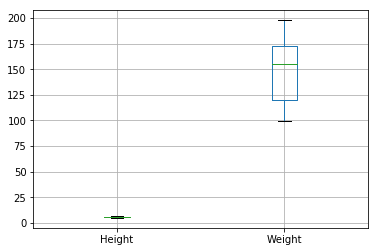

In [3]:
%matplotlib inline 

data.boxplot()

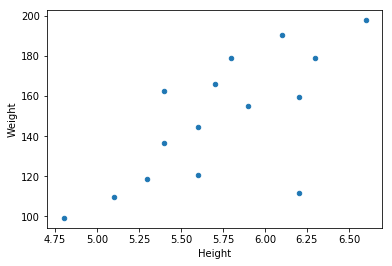

In [4]:
data.plot.scatter(x='Height',y='Weight')

# Z-Score Approach

In [5]:
Z = data.drop('Gender', axis=1)
Z = (Z - Z.mean())/Z.std()
Z

,Height,Weight
0,-1.895778,-1.572074
1,-1.286421,-1.244868
2,-0.880183,-0.952605
3,-0.677064,-0.390318
4,-0.677064,0.448347
5,-0.270825,-0.885893
6,-0.270825,-0.129824
7,-0.067706,0.546827
8,0.135413,0.972513
9,0.338532,0.197383


In [6]:
data.mean()

Height      5.733333
Weight    148.686667
dtype: float64

In [7]:
data.cov()

,Height,Weight
Height,0.242381,10.924048
Weight,10.924048,990.901238


In [8]:
import numpy as np

S = data.cov()
inv_S = pd.DataFrame(np.linalg.inv(S.values),S.columns,S.index)
inv_S

,Height,Weight
Height,8.200057,-0.090400
Weight,-0.090400,0.002006


The following example illustrates how to compute Mahalanobis distance of a point.

In [9]:
centered_data = (data.iloc[:,1:] - data.mean()).values
inv_S = np.linalg.inv(data.cov().values)

Z = np.zeros((centered_data.shape[0],1))
for i in range(Z.shape[0]):
    Z[i] = np.dot(centered_data[i],np.dot(inv_S,centered_data[i].T))

pd.DataFrame(Z,columns=['Z'])

,Z
0,3.704453
1,1.882060
2,0.994029
3,0.473436
4,2.161210
5,1.033355
6,0.080761
7,0.707163
8,1.547227
9,0.117985


In [10]:
data.corr()

,Height,Weight
Height,1.000000,0.704886
Weight,0.704886,1.000000


In [11]:
data['Height_inches'] = data['Height']*12
data[['Height_inches','Weight']].cov()

,Height_inches,Weight
Height_inches,34.902857,131.088571
Weight,131.088571,990.901238


In [12]:
data[['Height_inches','Weight']].corr()

,Height_inches,Weight
Height_inches,1.000000,0.704886
Weight,0.704886,1.000000


# Distance-based Outlier Detection (using numpy and scipy)

In [13]:
import pandas as pd

data = pd.read_csv('Synthetic_control_sample.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.448130,0.30272,0.39039,1.55520,1.36110,1.00610,0.636930,-0.51374,-0.69051,-1.5134,...,-0.89196,-0.73934,0.821470,1.13340,0.52480,1.5382,1.05790,0.10072,-0.079991,-0.734820
1,0.324930,0.92102,0.67606,1.56710,0.62195,0.23225,0.699970,-0.29080,-1.06150,-1.1291,...,-0.89692,-1.61170,0.049964,-0.20141,0.96575,1.5515,1.34120,0.54099,0.488130,0.075192
2,0.065106,0.27966,1.60660,0.90703,0.31790,-0.38201,-0.071902,-1.69230,-1.05300,-1.0928,...,-0.85534,-1.61720,-0.786690,-0.44217,0.61959,1.4380,1.21310,1.20440,0.411550,-0.733190
3,-0.197290,0.86487,0.91300,1.10690,1.13040,0.22366,-0.070158,-0.91154,-1.32590,-1.3727,...,-1.51920,-1.82530,-0.541960,-0.64238,0.20283,1.1598,1.76730,1.27050,0.200010,-0.351930
4,-0.295140,0.27611,1.36790,1.12880,0.68236,0.27383,-0.083935,-0.64006,-1.38620,-1.1307,...,-1.03950,-1.28350,-1.317100,-1.13480,-0.46492,0.5699,0.95651,0.87453,0.811540,-0.451390


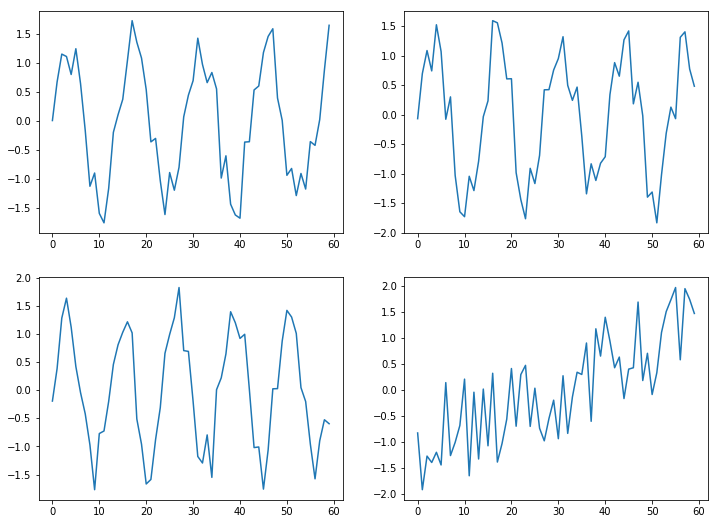

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,9))
ax1.plot(data.loc[5].T)
ax2.plot(data.loc[10].T)
ax3.plot(data.loc[45].T)
ax4.plot(data.loc[50].T)

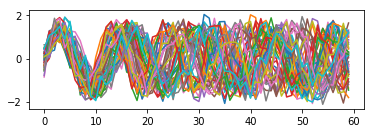

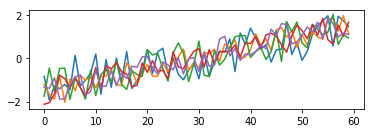

In [15]:
plt.figure().add_subplot(2,1,1)
plt.plot(data.loc[:49].T)
plt.figure().add_subplot(2,1,2)
plt.plot(data.loc[50:55].T)

In [16]:
from scipy.spatial import distance

Y = distance.pdist(data.values, 'correlation')
Y = distance.squareform(Y)
Y

array([[0.        , 0.20237268, 1.16745543, ..., 1.07495438, 1.02072118,
        1.11979732],
       [0.20237268, 0.        , 0.9807679 , ..., 1.09614197, 1.01776417,
        1.01390679],
       [1.16745543, 0.9807679 , 0.        , ..., 0.94071103, 0.97634081,
        0.95014835],
       ...,
       [1.07495438, 1.09614197, 0.94071103, ..., 0.        , 0.23309714,
        0.29398105],
       [1.02072118, 1.01776417, 0.97634081, ..., 0.23309714, 0.        ,
        0.19070761],
       [1.11979732, 1.01390679, 0.95014835, ..., 0.29398105, 0.19070761,
        0.        ]])

(array([30., 14.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([0.12014874, 0.20082507, 0.28150141, 0.36217775, 0.44285408,
        0.52353042, 0.60420675, 0.68488309, 0.76555943, 0.84623576,
        0.9269121 ]),
 <a list of 10 Patch objects>)

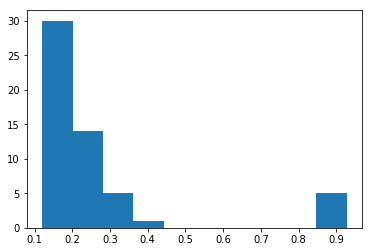

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

knn = 5
index = np.argsort(Y, axis=1)    # sort each row by increasing distance
index = index[:,knn]             
knnDist = Y[np.arange(len(index)),index]  # identify the k-th smallest distance
plt.hist(knnDist)

# Identify the outliers

In [18]:
outlier = np.flipud(np.argsort(knnDist))
sort_dist = np.flipud(np.sort(knnDist))
p = pd.DataFrame(np.column_stack((outlier,sort_dist)),columns=['index','score'])
p.head()

,index,score
0,53.0,0.926912
1,50.0,0.916242
2,54.0,0.913564
3,51.0,0.881758
4,52.0,0.869341


# Distance-based Outlier Detection (using scikit-learn)

(array([30., 14.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([0.12014874, 0.20082507, 0.28150141, 0.36217775, 0.44285408,
        0.52353042, 0.60420675, 0.68488309, 0.76555943, 0.84623576,
        0.9269121 ]),
 <a list of 10 Patch objects>)

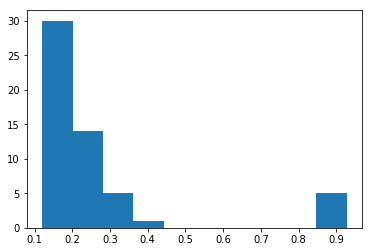

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn+1, metric=distance.correlation).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)
plt.hist(distances[:,knn])

In [20]:
outlier = np.flipud(np.argsort(distances[:,knn]))
sort_dist = np.flipud(np.sort(distances[:,knn]))

p = pd.DataFrame(np.column_stack((outlier,sort_dist)),columns=['index','score'])
p.head()

,index,score
0,53.0,0.926912
1,50.0,0.916242
2,54.0,0.913564
3,51.0,0.881758
4,52.0,0.869341


# Clustering-based Approach

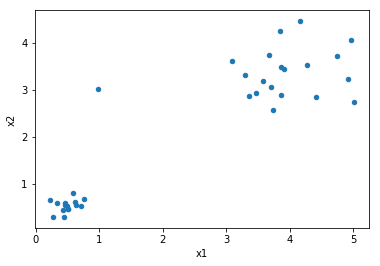

In [21]:
import pandas as pd
%matplotlib inline

data = pd.read_csv('2d_data.csv',header=None,names=['x1','x2'])
data.plot.scatter(x='x1',y='x2')

In [22]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=3, random_state=0)
clusterer.fit(data)
data['labels'] = clusterer.labels_
data

,x1,x2,labels
0,0.22766,0.66521,0
1,0.27647,0.29405,0
2,0.33026,0.59338,0
3,0.43302,0.45806,0
4,0.43938,0.31170,0
5,0.45648,0.55228,0
6,0.46096,0.60305,0
7,0.48643,0.52703,0
8,0.50461,0.46753,0
9,0.51026,0.47079,0


# Model-based Approach - Isolation Forest

In [23]:
from sklearn.ensemble import IsolationForest

data = pd.read_csv('Synthetic_control_sample.csv',header=None)
clf = IsolationForest(n_estimators=200, max_samples=30, contamination=0.1, 
                      random_state=1)
clf.fit(data.values)
score = clf.predict(data.values)
score

C:\Users\msi_pc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\msi_pc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1])